In [26]:
import importlib
import sys
import os,sys
sys.path.insert(1, os.path.join(os.getcwd()  , '..'))

In [27]:
%%capture
%run TradingStrategy.py
%run ApiClient.py
%run BaseStrategy.py
%run ExponentialMovingAverage
%run SimpleMovingAverageStrategy

import importlib
import numpy as np
import pandas as pd
import TradingStrategy as ts
import ApiClient as ac
import ExponentialMovingAverage as ema
import SimpleMovingAverageStrategy as sma

importlib.reload(ts)
importlib.reload(ac)
importlib.reload(ema)
importlib.reload(sma)


In [28]:
Api_Key =''
Secret_Key=''
endpoint='https://paper-api.alpaca.markets'

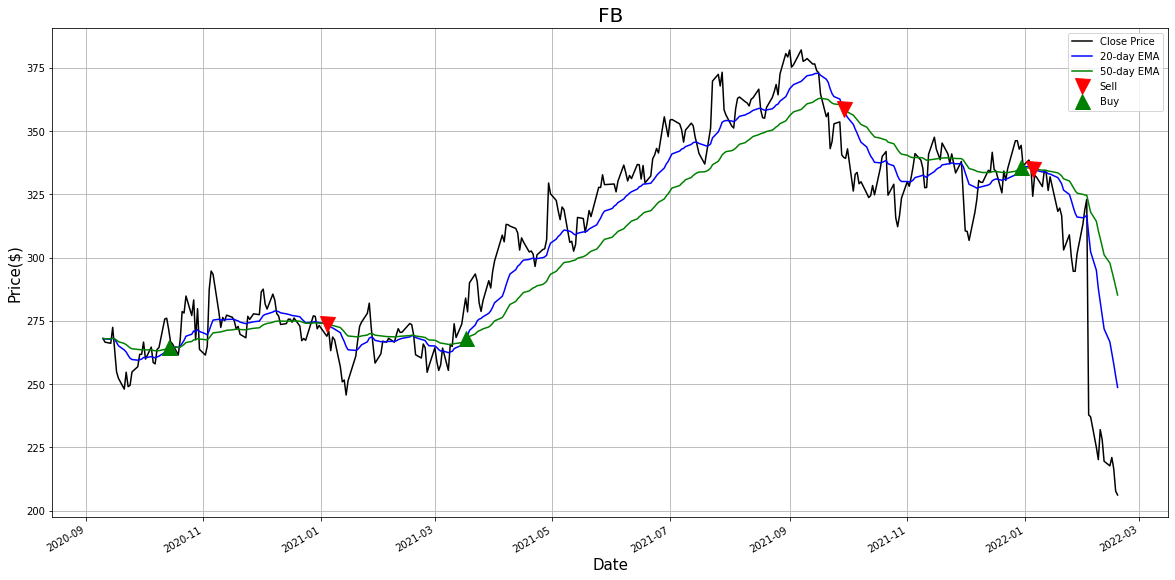

Percentage return of Buy and hold of FB for 365 day period:  -23.074598387693122%
Percentage return of EMA algorithm for FB for 365 day period:  12.189120529023507%


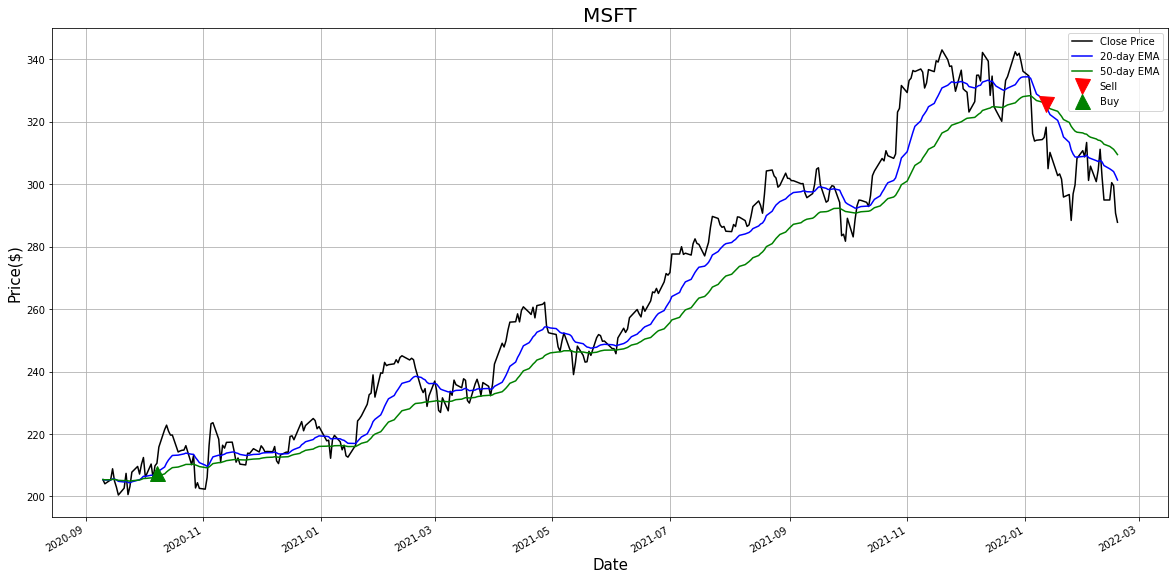

Percentage return of Buy and hold of MSFT for 365 day period:  40.140227870289216%
Percentage return of EMA algorithm for MSFT for 365 day period:  52.419904567143845%


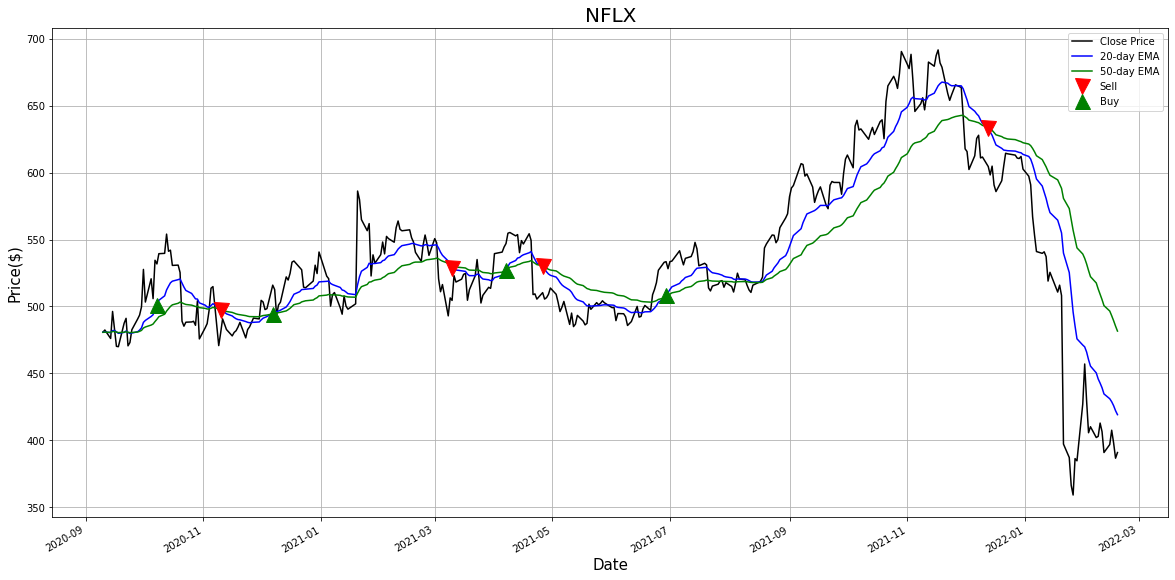

Percentage return of Buy and hold of NFLX for 365 day period:  -18.696701193893254%
Percentage return of EMA algorithm for NFLX for 365 day period:  -5.936187029410534%


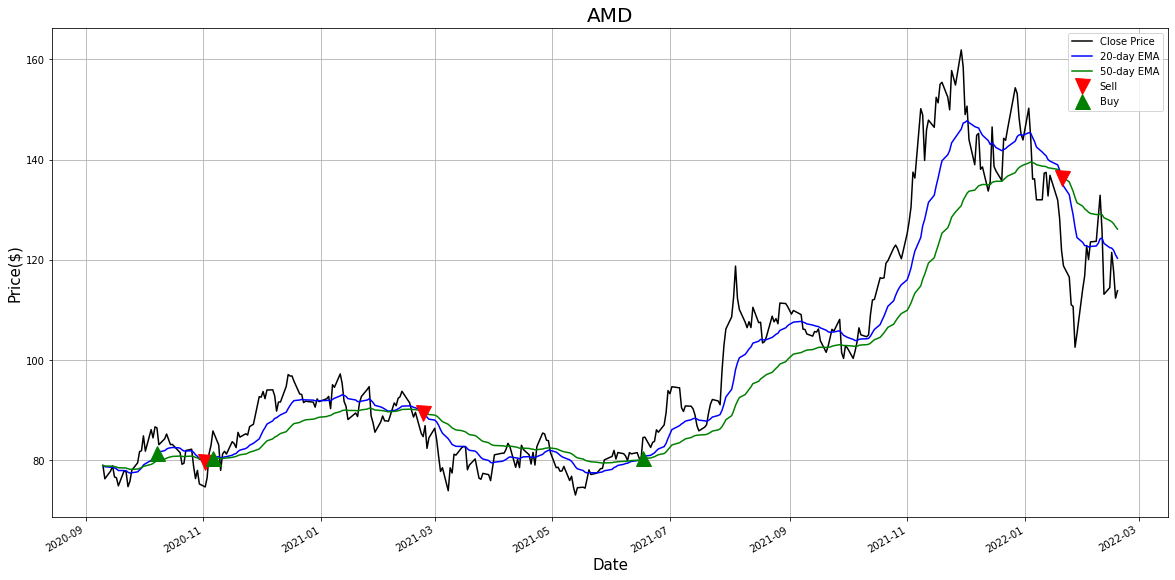

Percentage return of Buy and hold of AMD for 365 day period:  44.150417827298035%
Percentage return of EMA algorithm for AMD for 365 day period:  30.919220055710305%


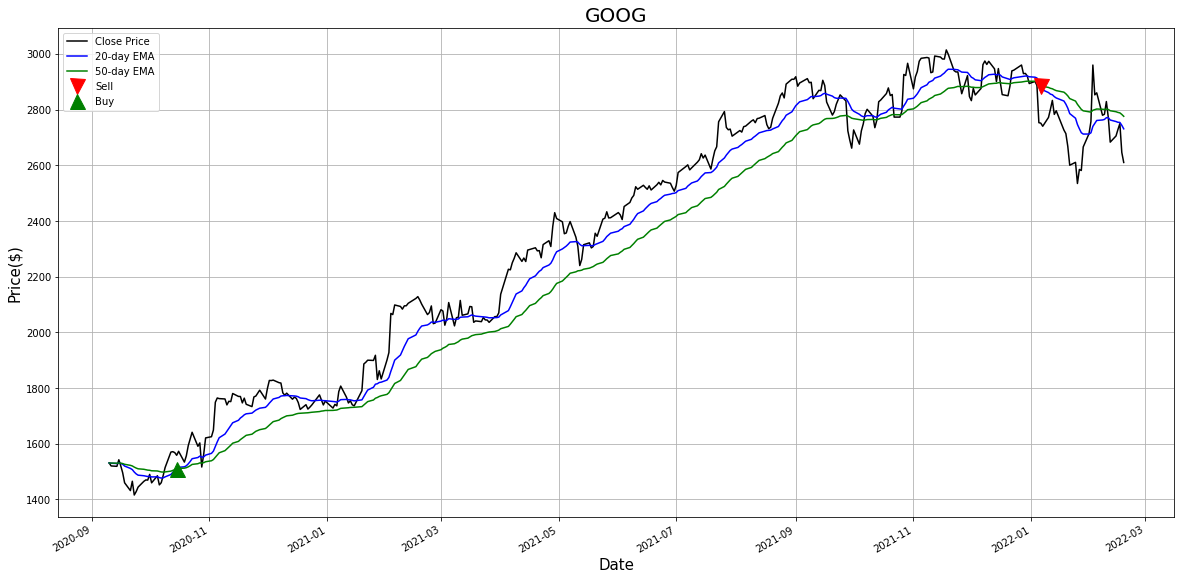

Percentage return of Buy and hold of GOOG for 365 day period:  70.46983372301099%
Percentage return of EMA algorithm for GOOG for 365 day period:  77.88960148382293%


In [30]:


client = ac.ApiClient(api_key_Id=Api_Key,api_key_secret=Secret_Key)

for ticker in ["FB","MSFT","NFLX","AMD","GOOG"]:
  df= client. get_closing_price(ticker,365)

  ema_instance = ema.ExponentialMovingAverage(df=df,ticker=ticker)

  #print(df.head(10))
  df= ema_instance.create_trading_strategy(long_period=50,short_period=20,column='close')

  # The returns of the Buy and Hold strategy:
  s, e = df.iloc[0]["close"], df.iloc[-1]["close"]

  pct_change = (e - s) / s * 100
  print(f'Percentage return of Buy and hold of {ticker} for 365 day period:  {pct_change}%') 
  
  # the returns of the algorithm
  pct_change_alg = ema_instance.calculate_profit(short_period=20)/s *100
  print(f'Percentage return of {ema_instance.mvType} algorithm for {ticker} for 365 day period:  {pct_change_alg}%') 
  
         
 

